In [282]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [283]:
dpe = DPE('COM3')

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


In [268]:
dpe.set_clock(50)

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


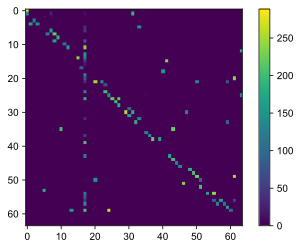

In [291]:
g = dpe.read(0, Tdly=0)
plt.imshow(g * 1e6)
plt.colorbar()

..

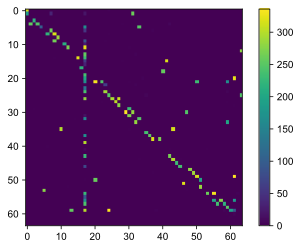

In [287]:
g = dpe.read(0, Tdly=500)
plt.imshow(g * 1e6)
plt.colorbar()

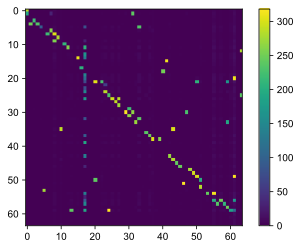

In [290]:
g = dpe.read(0, method='fast', Tdly=1000, mode=1)
plt.imshow(g * 1e6)
plt.colorbar()

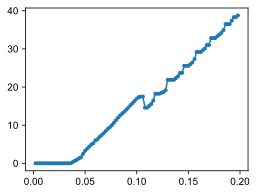

In [185]:
ar=0
r=11
c=17

Vgate = 5
Vreads = np.arange(0, 0.2, 0.002)

currs = []
for Vr in Vreads:
    g = dpe.read(ar, Vread=Vr, method='fast', Tdly=1000, mode=1)
    currs.append( g[r,c] * Vr )

currs = np.array(currs)
plt.figure(figsize=(4,3))
plt.plot(Vreads, currs*1e6, '.-')

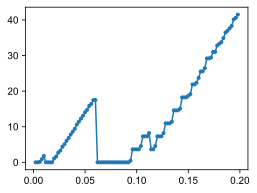

In [180]:
ar=0
r=11
c=17

Vgate = 5
Vreads = np.arange(0, 0.2, 0.002)

currs = []
for Vr in Vreads:
    g = dpe.read(ar, Vread=Vr, method='slow', Tdly=0, mode=1)
    currs.append( g[r,c] * Vr )

currs = np.array(currs)
plt.figure(figsize=(4,3))
plt.plot(Vreads, currs*1e6, '.-')

........................................................................................................................................................................................................

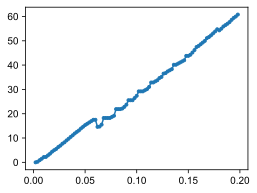

In [181]:
ar=0
r=11
c=17

Vgate = 5
Vreads = np.arange(0, 0.2, 0.002)

currs = []
for Vr in Vreads:
    g = dpe.read(ar, Vread=Vr, method='slow', Tdly=500, mode=1)
    currs.append( g[r,c] * Vr )

currs = np.array(currs)
plt.figure(figsize=(4,3))
plt.plot(Vreads, currs*1e6, '.-')

In [15]:
g[11,17]

0.0001687846203975236

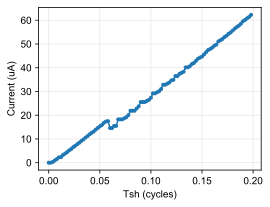

In [472]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 1)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    for Vr in Vreads:
        currs.append( dpe.a0.pic_read_single(Vread=Vr, Vgate=Vgate, array=ar, row=r, col=c, gain=-1))

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

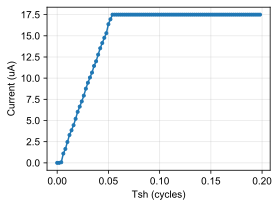

In [473]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    for Vr in Vreads:
        currs.append( dpe.a0.pic_read_single(Vread=Vr, Vgate=Vgate, array=ar, row=r, col=c, gain=3))

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

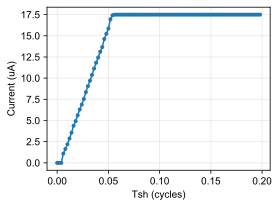

In [474]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.002)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    for Vr in Vreads:
        currs.append( dpe.a0.read_single_int(Vread=Vr, Vgate=Vgate, array=ar, row=r, col=c, gain=3))
        
plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

In [189]:
import time
dpe.set_clock(5)

Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz


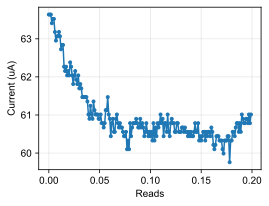

In [16]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 2)
Vgate = 5
Vread = 0.2

Vreads = np.arange(0,0.2, 0.001)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    _ = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, col=c, gain=-1)
    for Vr in Vreads:
        currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, col=c, gain=-1, skip_conf=True) )
#         time.sleep(5e-3)
        

plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Reads')
plt.grid(True, alpha=0.3)

# plt.ylim(7.5, 8.5)

In [244]:
dpe.set_clock(50)

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


0.3429868221282959


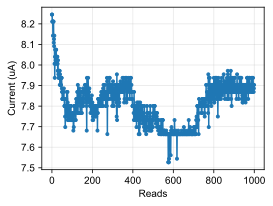

In [216]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.03

Vreads = np.arange(1000)

gain = -1

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    #_ = dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=-1)
    a = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                   col=c, gain=gain, skip_conf=False) 
    ts = time.time()
    for Vr in Vreads:
#         dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=gain)
        currs.append( dpe.a0.pic_read_single_test(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                  col=c, gain=gain, skip_conf=True, T1=0, T2=0, T3=0, Nt=0) )
#          currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
#                                                    col=c, gain=gain, skip_conf=False) )
#         time.sleep(10e-3)
    print(time.time()-ts)
plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Reads')
plt.grid(True, alpha=0.3)

# plt.ylim(7.5, 8.5)

In [238]:
for div in np.geomspace(2,64,6):
    print(np.round(div), '\t', 100/div)

2.0 	 50.0
4.0 	 25.000000000000007
8.0 	 12.500000000000002
16.0 	 6.250000000000003
32.0 	 3.125000000000001
64.0 	 1.5625000000000004


50.0
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
0.3860325813293457
25.0
Setting ADC_CK freq=25000.0kHz
Setting CK_ARRAY freq=25000.0kHz
0.4510383605957031
12.5
Setting ADC_CK freq=12500.0kHz
Setting CK_ARRAY freq=12500.0kHz
0.5100409984588623
6.25
Setting ADC_CK freq=6250.0kHz
Setting CK_ARRAY freq=6250.0kHz
0.5440247058868408
3.13
Setting ADC_CK freq=3225.8064516129034kHz
Setting CK_ARRAY freq=3225.8064516129034kHz
0.7750794887542725
1.56
Setting ADC_CK freq=1562.5kHz
Setting CK_ARRAY freq=1562.5kHz
1.1840767860412598


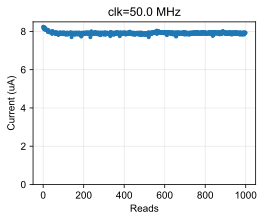

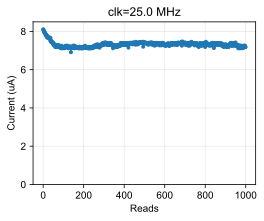

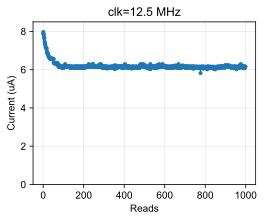

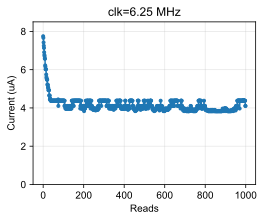

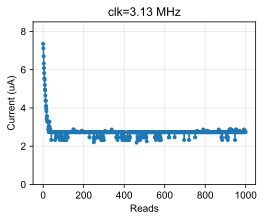

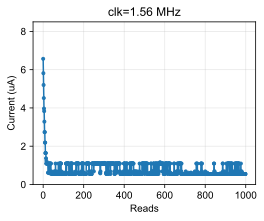

In [240]:
for div in np.geomspace(2,64,6):
    clk = np.round(100/div *100) / 100
    print(clk)
    
    dpe.set_clock(clk)
    
    ar=0
    r=11
    c=17

    Tsh_list = np.arange(0, 255, 5)
    Vgate = 5
    Vread = 0.03

    Vreads = np.arange(1000)

    gain = -1

    with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
        dpe.a0.dut.connect(ser)

        currs = []

        #_ = dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=-1)
        a = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                       col=c, gain=gain, skip_conf=False) 
        ts = time.time()
        for Vr in Vreads:
    #         dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=gain)
            currs.append( dpe.a0.pic_read_single_test(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                      col=c, gain=gain, skip_conf=True, T1=0, T2=0, T3=0, Nt=0) )
    #          currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
    #                                                    col=c, gain=gain, skip_conf=False) )
    #         time.sleep(10e-3)
        print(time.time()-ts)
    plt.figure(figsize=(4,3))

    plt.plot(Vreads, [i* 1e6 for i in currs], '.-')

    plt.ylabel('Current (uA)')
    plt.xlabel('Reads')
    plt.grid(True, alpha=0.3)

    plt.ylim(0, 8.5)
    plt.title(f'clk={clk} MHz')

Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
50.0
Setting ADC_CK freq=50000.0kHz
0.502068281173706
25.0
Setting ADC_CK freq=25000.0kHz
0.5160403251647949
12.5
Setting ADC_CK freq=12500.0kHz
0.5380492210388184
6.25
Setting ADC_CK freq=6250.0kHz
0.6140549182891846
3.13
Setting ADC_CK freq=3225.8064516129034kHz
0.6350367069244385
1.56
Setting ADC_CK freq=1562.5kHz
0.937079668045044


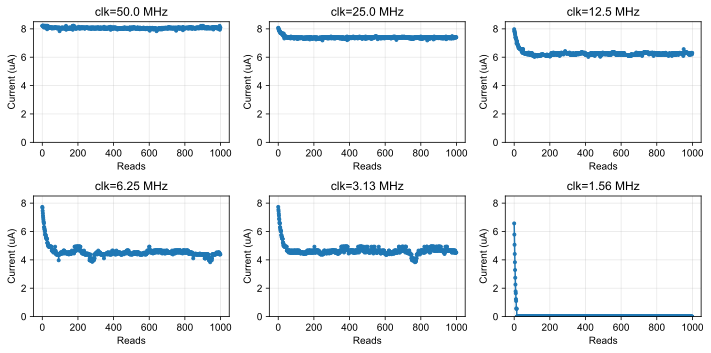

In [281]:
plt.figure(figsize=(10,5))
dpe.set_clock(5)

i=0
for div in np.geomspace(2,64,6):
    i += 1
    clk = np.round(100/div *100) / 100
    print(clk)
    
    ar=0
    r=11
    c=17

    Tsh_list = np.arange(0, 255, 5)
    Vgate = 5
    Vread = 0.03

    Vreads = np.arange(1000)

    gain = -1

    with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
        dpe.a0.dut.connect(ser)
        
        drv = dpe.a0.drv
        drv.clk_stop('ADC_CK')
#         drv.clk_stop('CK_ARRAY')
        drv.clk_config('ADC_CK', divisor=100//clk)
#         drv.clk_config('CK_ARRAY', divisor=100//clk)
        drv.clk_start('ADC_CK')
#         drv.clk_start('CK_ARRAY')

        currs = []

        #_ = dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=-1)
        a = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                       col=c, gain=gain, skip_conf=False) 
        ts = time.time()
        for Vr in Vreads:
    #         dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=gain)
            currs.append( dpe.a0.pic_read_single_test(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                      col=c, gain=gain, skip_conf=True, T1=0, T2=0, T3=0, Nt=0) )
    #          currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
    #                                                    col=c, gain=gain, skip_conf=False) )
    #         time.sleep(10e-3)
        print(time.time()-ts)
    

    plt.subplot(2,3,i)
    plt.plot(Vreads, [i* 1e6 for i in currs], '.-')

    plt.ylabel('Current (uA)')
    plt.xlabel('Reads')
    plt.grid(True, alpha=0.3)

    plt.ylim(0, 8.5)
    plt.title(f'clk={clk} MHz')
    
plt.tight_layout()

10
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
0.5190432071685791
30
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
0.5230216979980469
100
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
0.5410451889038086
300
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
0.7651073932647705
1000
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
1.5211572647094727
3000
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz
3.600338935852051


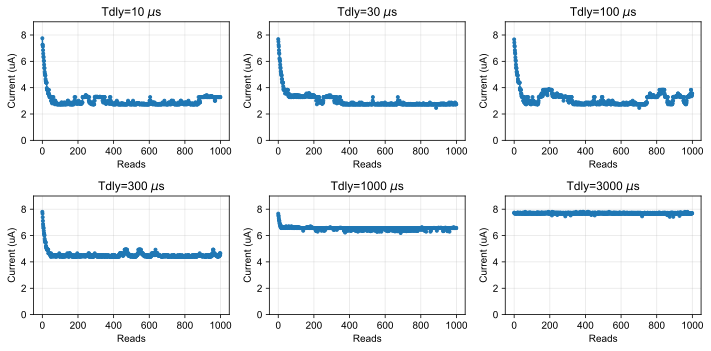

In [277]:
plt.figure(figsize=(10,5))

i = 0
for Tdly in [10, 30, 100, 300, 1000, 3000]:
    print(Tdly)
    i += 1
    
    dpe.set_clock(5)
    
    ar=0
    r=11
    c=17

    Tsh_list = np.arange(0, 255, 5)
    Vgate = 5
    Vread = 0.03

    Vreads = np.arange(1000)

    gain = 3

    with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
        dpe.a0.dut.connect(ser)

        currs = []

        #_ = dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=-1)
        a = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                       col=c, gain=gain, skip_conf=False) 
        ts = time.time()
        for Vr in Vreads:
    #         dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=gain)
            currs.append( dpe.a0.pic_read_single_test(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                      col=c, gain=gain, skip_conf=True, T1=0, T2=0, T3=Tdly, Nt=0) )
    #          currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
    #                                                    col=c, gain=gain, skip_conf=False) )
    #         time.sleep(10e-3)
        print(time.time()-ts)
#     plt.figure(figsize=(4,3))

    plt.subplot(2,3,i)
    plt.plot(Vreads, [i* 1e6 for i in currs], '.-')

    plt.ylabel('Current (uA)')
    plt.xlabel('Reads')
    plt.grid(True, alpha=0.3)

    plt.ylim(0, 9.0)
    plt.title(f'Tdly={Tdly} $\mu$s')
plt.tight_layout()

In [54]:
import time

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    ts = time.time()
    for _ in range(1000):
        dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=gain)

    print(time.time()-ts)

21.9689884185791


In [27]:
5.8/10000 * 1000

0.58

In [499]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.03

Vreads = np.arange(0,0.2, 0.001)

gain = -1

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    #_ = dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=-1)
    _ = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                   col=c, gain=gain, skip_conf=False) 
    for Vr in Vreads:
        currs.append( dpe.a0.pic_read_single_test(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                  col=c, gain=gain, skip_conf=True, T1=0, T2=0, T3=0, Nt=1, raw=True) )
#         currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
#                                                   col=c, gain=-1, skip_conf=True) )
#         time.sleep(10e-3)

for cur in currs:
    print(f'{cur:016b}')
# plt.ylim(7.5, 8.5)

0000110111100000
0000110111100100
0000110111100001
0000110111100100
0000110111100010
0000110111100001
0000110111100000
0000110111100000
0000110111100001
0000110111100000
0000110111011001
0000110111011011
0000110111011011
0000110111011000
0000110111011000
0000110111010110
0000110111010100
0000110111010100
0000110111010110
0000110111010101
0000110111010101
0000110111010010
0000110111010111
0000110111010100
0000110111010010
0000110111010101
0000110111010010
0000110111010100
0000110111010010
0000110111010010
0000110111010100
0000110111010010
0000110111010000
0000110111010010
0000110111001110
0000110111010001
0000110111010000
0000110111010001
0000110111010000
0000110111001110
0000110111010000
0000110111010000
0000110111010001
0000110111001101
0000110111010000
0000110111001110
0000110111010000
0000110111001100
0000110111001100
0000110111010000
0000110111010000
0000110111001100
0000110111001101
0000110111001010
0000110111001110
0000110111001101
0000110111001010
0000110111001010
00001101110010

In [431]:
1000*0.02*2

40.0

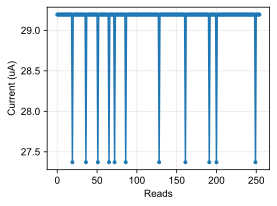

In [22]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 1)
Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.001)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
#     _ = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, col=c, gain=-1)
    for Tsh in Tsh_list:
        currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=Vgate, array=ar, row=r, col=c, gain=-1,Tsh=Tsh) )

plt.figure(figsize=(4,3))

plt.plot(Tsh_list, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Reads')
plt.grid(True, alpha=0.3)

In [24]:
ar=0
r=11
c=17

Vgate = 5
Vread = 0.1

Vreads = np.arange(0,0.2, 0.0001)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = dpe.a0.pic_read_batch(0, Vread=Vread, gain=-1)
#     for Vr in Vreads:
#         currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=Vgate, array=ar, row=r, col=c, gain=-1, skip_conf=True) )

# plt.figure(figsize=(4,3))

# plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
# plt.ylabel('Current (uA)')
# plt.xlabel('Tsh (cycles)')
# plt.grid(True, alpha=0.3)

print(currs[r,c])

0.0


In [105]:
ts = time.time()

for _ in range(1000):
    time.sleep(1e-3)
    
print(time.time()-ts)

1.4931635856628418


In [126]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    dpe.a0.pic_write_single_ext(1, 0.5, array=0, row=0, col=0, mode=1, Twidth=100)

DAC initialized to a span from -10 V to 10 V


In [219]:
from misc import *
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    drv = dpe.a0.drv

    drv.gpio_pin_reset(*PIC_PINS['PIC_CLR'])
    # time.sleep(1)
    drv.gpio_pin_set(*PIC_PINS['PIC_CLR'])

In [310]:
ser = serial.Serial(dpe.ser_name, 9600, timeout=1)
dpe.a0.dut.connect(ser)

drv = dpe.a0.drv
dut = dpe.a0.dut

In [221]:
drv.gpio_pin_reset(*PIC_PINS['PIC_CLR'])
# time.sleep(1)
drv.gpio_pin_set(*PIC_PINS['PIC_CLR'])

In [316]:
dpe.a0.pic_write_single_ext(1, 0.1, array=0, row=0, col=0, mode=1, Twidth=10)

In [134]:
dut.dac_set('DAC_VP_PAD', 0)

In [117]:
dut.dac_init()

DAC initialized to a span from -10 V to 10 V


In [76]:
dut.dac_volt2raw(0.5)

34405

In [225]:
dut.disconnect()

In [215]:
drv.gpio_pin_reset(*PIC_PINS['CONNECT_COLUMN_T'])
# time.sleep(1)


In [216]:
drv.gpio_pin_set(*PIC_PINS['CONNECT_COLUMN_T'])

In [218]:
drv.gpio_pin_set(*PIC_PINS['CONNECT_TIA'])
drv.gpio_pin_reset(*PIC_PINS['CONNECT_TIA'])


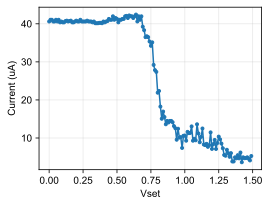

In [30]:
ar=0
r=0
c=0


Vset = np.arange(0,1.5, 0.01)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    for Vs in Vset:
        dpe.a0.pic_write_single_ext(Vwrite=Vs, Vgate=5, array=ar, row=r, col=c, mode=0, Twidth=10)
        currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=5, array=ar, row=r, col=c, gain=-1 ) )

plt.figure(figsize=(4,3))

plt.plot(Vset, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Vset')
plt.grid(True, alpha=0.3)

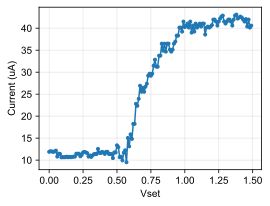

In [27]:
ar=0
r=0
c=0


Vset = np.arange(0,1.5, 0.01)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    for Vs in Vset:
        dpe.a0.pic_write_single_ext(Vwrite=Vs, Vgate=1.5, array=ar, row=r, col=c, mode=1, Twidth=1000)
        currs.append( dpe.a0.pic_read_single(Vread=0.1, Vgate=5, array=ar, row=r, col=c, gain=-1 ) )

plt.figure(figsize=(4,3))

plt.plot(Vset, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Vset')
plt.grid(True, alpha=0.3)

In [11]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    dpe.a0.dut.vrefs_defaults()

Setting vrefs to default
